In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install livelossplot

##**Data Pre-Processing**

In [ ]:
import os
from keras.models import Model
from keras.optimizers import Adam,SGD,RMSprop
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import InceptionV3,InceptionResNetV2,ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from livelossplot.inputs.keras import PlotLossesCallback

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def load_images_from_folder(folder):  
    for filename in os.listdir(folder):
        if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images
images = []
folders = [
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/train/urban_areas',
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/train/plain_lands',
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/train/water_bodies',
]

for folder in folders:
    images = load_images_from_folder(folder)
    # your code that does something with the return images goes here

In [ ]:
images=np.array(images)
list1=[]
for i in range(len(images)):
  img = cv2.resize(images[i], dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
  list1.append(img)
img=np.array(list1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


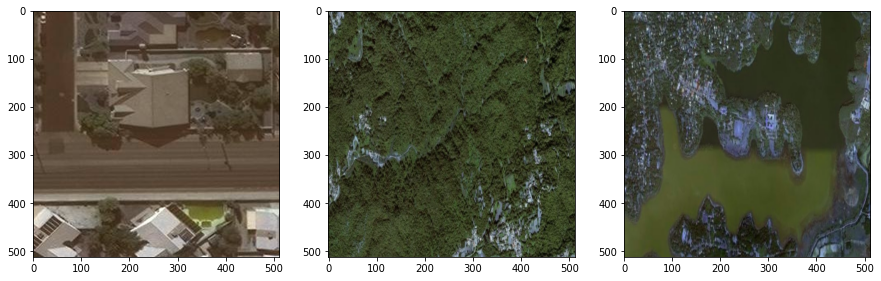

In [ ]:
fig1, ax1 = plt.subplots(1, 3, figsize=(15, 15))

ax1[0].imshow(img[52])
ax1[1].imshow(img[128])
ax1[2].imshow(img[256])

In [ ]:
kernel = np.ones((7,7),np.uint8)
#train_erosion = cv2.dilate(img,kernel,iterations = 1)
#train_dilation = cv2.erode(img,kernel,iterations = 1)
train_image=[]
for i in range(len(img)):
  erosion = cv2.morphologyEx(img[i], cv2.MORPH_OPEN, kernel)
  train_image.append(erosion)
train_image=np.array(train_image)

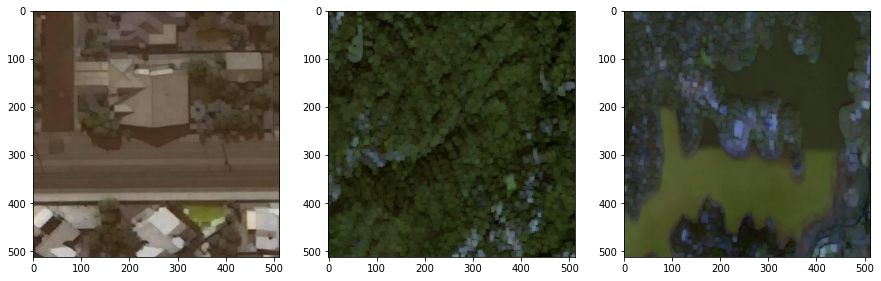

In [ ]:
fig2, ax2 = plt.subplots(1, 3, figsize=(15, 15))

ax2[0].imshow(train_image[52])
ax2[1].imshow(train_image[128])
ax2[2].imshow(train_image[256])

In [ ]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float


list1=[]
for i in range(len(train_image)):
  img = img_as_float(train_image[i])

  segments_slic = slic(img, n_segments=100, compactness=10, sigma=1)#slic is the best used segmentation for our project
  segments_slic = mark_boundaries(train_image[i],segments_slic)
  list1.append(segments_slic)

train_seg_image=np.array(list1)

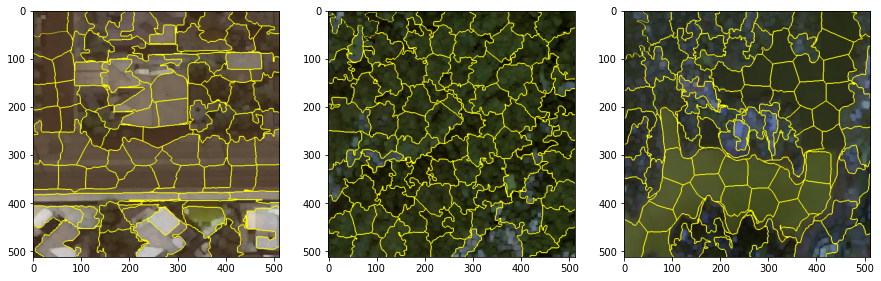

In [ ]:
fig3, ax3 = plt.subplots(1, 3, figsize=(15, 15))

ax3[0].imshow(train_seg_image[52])
ax3[1].imshow(train_seg_image[128])
ax3[2].imshow(train_seg_image[256])

In [ ]:
train_labels=[]
for i in range(330):
  train_labels.append('0')
for i in range(330):
  train_labels.append('1')
for i in range(330):
  train_labels.append('2')
train_labels=np.asarray(train_labels)

In [ ]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)

In [ ]:
def load_images_from_folder(folder):  
    for filename in os.listdir(folder):
        if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                val_images.append(img)
    return val_images
val_images = []
folders = [
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/val/urban_areas',
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/val/plain_lands',
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/val/water_bodies',
]

for folder in folders:
    val_images = load_images_from_folder(folder)

In [ ]:
val_image=np.array(val_images)
list1=[]
for i in range(len(val_image)):
  img2 = cv2.resize(val_image[i], dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
  list2.append(img2)
val_image=np.array(list2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
kernel = np.ones((7,7),np.uint8)
image_list=[]
for i in range(len(val_image)):
  erosion = cv2.morphologyEx(val_image[i], cv2.MORPH_OPEN, kernel)
  image_list.append(erosion)
val_image=np.array(image_list)

In [ ]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

list6=[]
for i in range(len(val_image)):
  img3 = img_as_float(val_image[i])
  
  segments_slic2 = slic(img3, n_segments=100, compactness=10, sigma=1)
  slic_bound2 = mark_boundaries(val_image[i],segments_slic2)
  list6.append(slic_bound2)

val_seg_image=np.array(list5)

In [ ]:
val_labels=[]
for i in range(18):
  val_labels.append(0)
for i in range(18):
  val_labels.append(1)
for i in range(18):
  val_labels.append(2)
val_labels=np.array(val_labels)
val_labels=to_categorical(val_labels)

In [ ]:
def load_images_from_folder(folder):  
    for filename in os.listdir(folder):
        if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                test_images.append(img)
    return test_images
test_images = []
folders = [
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/test/urban_areas',
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/test/plain_lands',
    '/content/drive/MyDrive/Colab Notebooks/Research Paper/test/water_bodies',
]

for folder in folders:
    test_images = load_images_from_folder(folder)

In [ ]:
test_image=np.array(test_images)
list3=[]
for i in range(len(test_image)):
  img3 = cv2.resize(test_image[i], dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
  list3.append(img3)
test_image=np.array(list3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
kernel = np.ones((7,7),np.uint8)
image_list=[]
for i in range(len(test_image)):
  erosion = cv2.morphologyEx(test_image[i], cv2.MORPH_OPEN, kernel)
  image_list.append(erosion)
test_image=np.array(image_list)

In [ ]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

list7=[]
for i in range(len(test_image)):
  img4 = img_as_float(test_image[i])
  
  segments_slic3 = slic(img4, n_segments=100, compactness=10, sigma=1)
  slic_bound3 = mark_boundaries(test_image[i],segments_slic3)
  list7.append(slic_bound3)

test_seg_image=np.array(list7)

In [ ]:
test_labels=[]
for i in range(18):
  test_labels.append(0)
for i in range(18):
  test_labels.append(1)
for i in range(18):
  test_labels.append(2)
test_labels=np.array(test_labels)
test_labels=to_categorical(test_labels)

In [ ]:
x = ImageDataGenerator(rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True)

In [ ]:
x.fit(train_seg_image)

##**VGG-16 (A)**

In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(128, activation='relu')(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    

    model = Model(inputs=conv_base.input, outputs=output_layer)


    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
n_classes=3
n_epochs = 15
batch_size = 16
n_steps = 19

In [ ]:
input_shape = (512, 512, 3)
optim_1 = SGD(learning_rate=0.001)


#  without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [ ]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

#  best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)


early_stop = EarlyStopping(monitor='accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

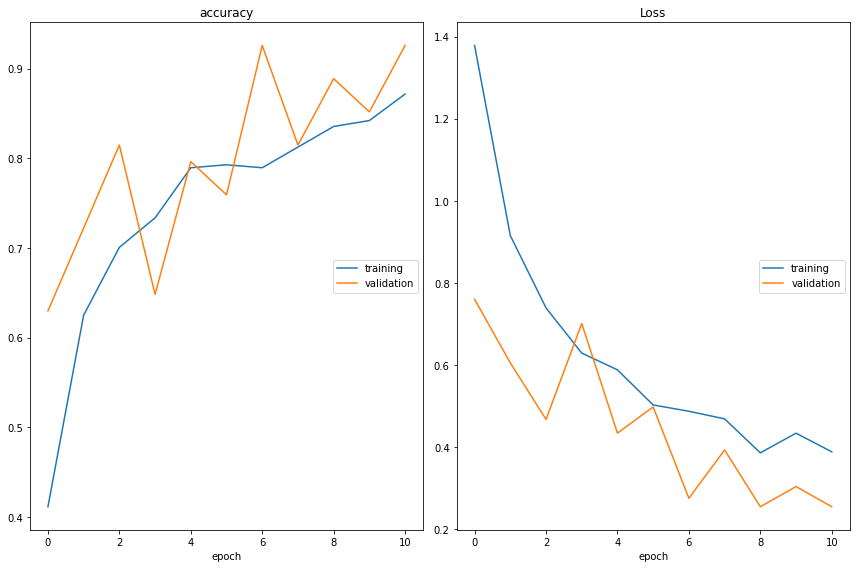

accuracy
	training         	 (min:    0.411, max:    0.872, cur:    0.872)
	validation       	 (min:    0.630, max:    0.926, cur:    0.926)
Loss
	training         	 (min:    0.385, max:    1.378, cur:    0.388)
	validation       	 (min:    0.254, max:    0.760, cur:    0.254)


In [ ]:
vgg_history = vgg_model.fit(train_seg_image,
                            epochs=n_epochs,
                            validation_data=valid_seg_image,
                            steps_per_epoch=n_steps,
                            callbacks=[tl_checkpoint_1, early_stop,plot_loss_1],
                            verbose=1)

In [ ]:
vgg_model.load_weights('tl_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_seg_image.classes
class_indices = train_seg_image.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = vgg_model.predict(test_seg_image)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)

print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 78.21%


**3. VGG16 (B)**

In [ ]:
train_seg_image.reset()
valid_seg_image.reset()
test_seg_image.reset()

# smaller learning rate
optim_2 = SGD(lr=0.0001)

#with Fine-Tuning
vgg_model_ft = create_model(input_shape, n_classes, optim_2, fine_tune=2)

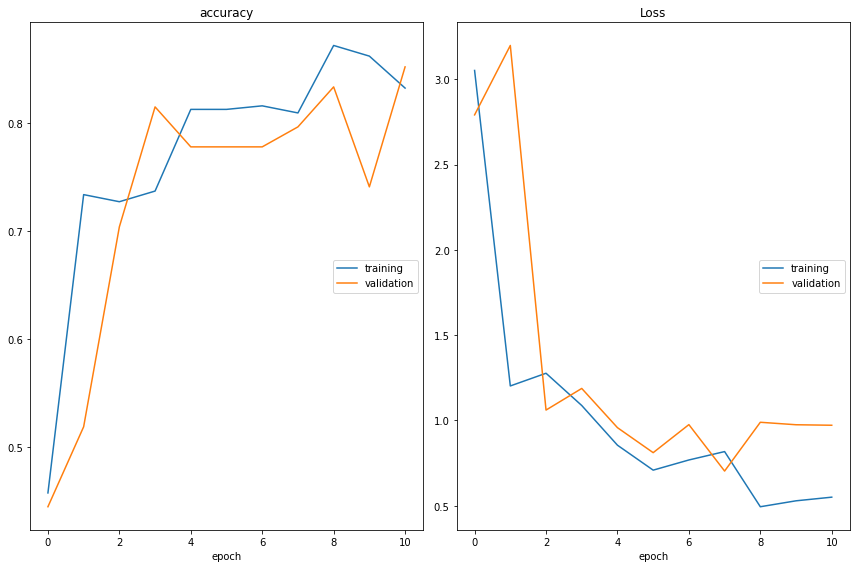

accuracy
	training         	 (min:    0.457, max:    0.872, cur:    0.832)
	validation       	 (min:    0.444, max:    0.852, cur:    0.852)
Loss
	training         	 (min:    0.494, max:    3.052, cur:    0.550)
	validation       	 (min:    0.703, max:    3.198, cur:    0.972)
CPU times: user 5min 29s, sys: 7.03 s, total: 5min 36s
Wall time: 5min 29s


In [ ]:
%%time

plot_loss_2 = PlotLossesCallback()

t2_checkpoint_1 = ModelCheckpoint(filepath='t2_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

vgg_ft_history = vgg_model_ft.fit(train_seg_image,
                                  epochs=n_epochs,
                                  validation_data=valid_seg_image,
                                  steps_per_epoch=n_steps, 
                                  callbacks=[t2_checkpoint_1, early_stop,plot_loss_2],
                                  verbose=1)

In [ ]:
vgg_model_ft.load_weights('tl_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_seg_image.classes
vgg_preds_ft = vgg_model_ft.predict(test_seg_image)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)

In [ ]:
vgg_acc_ft = accuracy_score(true_classes, vgg_pred_classes_ft)

print("VGG16 Model Accuracy with Fine-Tuning: {:.2f}%".format(vgg_acc_ft * 100))

VGG16 Model Accuracy with Fine-Tuning: 68.90%


**Inception-V3 (A)**

In [ ]:
n_classes=3
n_epochs = 15
batch_size = 16
n_steps = 19

In [ ]:
def create_model2(input_shape, optimizer='rmsprop', fine_tune=0):
    
    conv_base = InceptionV3(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
  
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    top_model = conv_base.output
    top_model = Flatten()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(128, activation='relu')(top_model)
    output_layer = Dense(3, activation='softmax')(top_model)
    

    model = Model(inputs=conv_base.input, outputs=output_layer)

    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
input_shape = (512, 512, 3)
optim_3 = Adam(learning_rate=0.0001)

#  without Fine-tuning
inception_model = create_model2(input_shape, optim_3, fine_tune=0)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
inception_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 255, 255, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 255, 255, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 255, 255, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
t3_checkpoint_1 = ModelCheckpoint(filepath='t3_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

inception_history = inception_model.fit(train_seg_image,validation_data=valid_seg_image,
                    epochs=15,steps_per_epoch=len(train_seg_image),
                    validation_steps=len(valid_seg_image),
                    callbacks=[t3_checkpoint_1, early_stop])


Epoch 1/15
19/19 [==============================] - 139s 6s/step - loss: 69.0505 - accuracy: 0.2985 - val_loss: 4.7546 - val_accuracy: 0.5556

Epoch 00001: val_loss improved from inf to 4.75461, saving model to t3_model_v1.weights.best.hdf5
Epoch 2/15
19/19 [==============================] - 26s 1s/step - loss: 8.6146 - accuracy: 0.5054 - val_loss: 13.9934 - val_accuracy: 0.4630

Epoch 00002: val_loss did not improve from 4.75461
Epoch 3/15
19/19 [==============================] - 26s 1s/step - loss: 16.9599 - accuracy: 0.5685 - val_loss: 11.8594 - val_accuracy: 0.4630

Epoch 00003: val_loss did not improve from 4.75461
Epoch 4/15
19/19 [==============================] - 26s 1s/step - loss: 10.1644 - accuracy: 0.5821 - val_loss: 6.8881 - val_accuracy: 0.6296

Epoch 00004: val_loss did not improve from 4.75461
Epoch 5/15
19/19 [==============================] - 26s 1s/step - loss: 10.4717 - accuracy: 0.5627 - val_loss: 5.4438 - val_accuracy: 0.6481

Epoch 00005: val_loss did not improve

In [ ]:
import matplotlib.pyplot as plt
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1,12)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

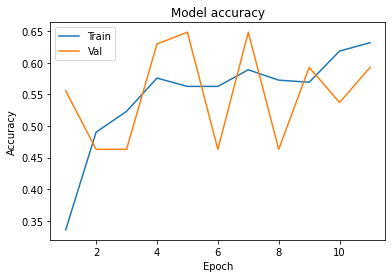

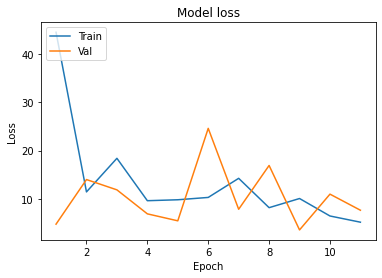

In [ ]:
plot_learningCurve(inception_history)

In [ ]:
inception_model.load_weights('t3_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_seg_image.classes
class_indices = train_seg_image.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

inception_preds = inception_model.predict(test_seg_image)
inception_pred_classes = np.argmax(inception_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

inception_acc = accuracy_score(true_classes, inception_pred_classes)

print("InceptionV3 Model Accuracy without Fine-Tuning: {:.2f}%".format(inception_acc * 100))

InceptionV3 Model Accuracy without Fine-Tuning: 55.78%


**Inception V3 (b)**

In [ ]:
train_seg_image.reset()
valid_seg_image.reset()
test_seg_image.reset()

# smaller learning rate
optim_4 = Adam(lr=0.0001)

#with Fine-Tuning
inception_model_ft = create_model2(input_shape, optim_4, fine_tune=2)

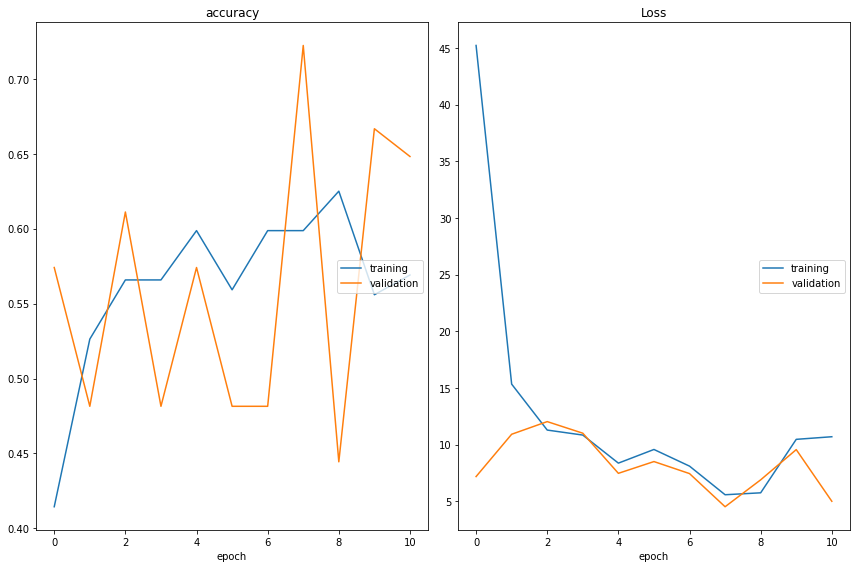

accuracy
	training         	 (min:    0.414, max:    0.625, cur:    0.569)
	validation       	 (min:    0.444, max:    0.722, cur:    0.648)
Loss
	training         	 (min:    5.580, max:   45.219, cur:   10.698)
	validation       	 (min:    4.522, max:   12.033, cur:    5.004)
CPU times: user 5min 34s, sys: 31.5 s, total: 6min 5s
Wall time: 8min 33s


In [ ]:
%%time

from livelossplot.inputs.keras import PlotLossesCallback
plot_loss_4 = PlotLossesCallback()

t4_checkpoint_1 = ModelCheckpoint(filepath='t4_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)


inception_ft_history = inception_model_ft.fit(train_seg_image,validation_data=valid_seg_image,
                    epochs=15,steps_per_epoch=len(train_seg_image),
                    validation_steps=len(valid_seg_image),
                    callbacks=[t4_checkpoint_1, early_stop,plot_loss_4])

In [ ]:
inception_model_ft.load_weights('t4_model_v1.weights.best.hdf5') # initialize the best trained weights

inception_preds_ft = inception_model_ft.predict(test_seg_image)
inception_pred_classes_ft = np.argmax(inception_preds_ft, axis=1)

In [ ]:
inception_acc_ft = accuracy_score(true_classes, inception_pred_classes_ft)

print("InceptionV3 Model Accuracy with Fine-Tuning: {:.2f}%".format(inception_acc_ft * 100))

InceptionV3 Model Accuracy with Fine-Tuning: 61.30%


**InceptionResNetV2-(A)**

In [ ]:
def create_model3(input_shape, optimizer='rmsprop', fine_tune=0):
    
    conv_base = InceptionResNetV2(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
  
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    top_model = conv_base.output
    top_model = Flatten()(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model=  Dropout(0.2)(top_model)
    top_model = Dense(128, activation='relu')(top_model)
    output_layer = Dense(3, activation='softmax')(top_model)
    

    model = Model(inputs=conv_base.input, outputs=output_layer)

    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
input_shape = (512, 512, 3)
optim_5 = Adam(learning_rate=0.0001)

#  without Fine-tuning
inception_res_model = create_model3(input_shape, optim_5, fine_tune=0)

In [ ]:
t5_checkpoint_1 = ModelCheckpoint(filepath='t5_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

inception_res_history = inception_res_model.fit(train_seg_image,validation_data=valid_seg_image,
                    epochs=15,steps_per_epoch=len(train_seg_image),
                    validation_steps=len(valid_seg_image),
                    callbacks=[t5_checkpoint_1, early_stop])

Epoch 1/15
19/19 [==============================] - 70s 2s/step - loss: 667.0293 - accuracy: 0.4058 - val_loss: 264.3282 - val_accuracy: 0.3333

Epoch 00001: val_loss improved from inf to 264.32816, saving model to t5_model_v1.weights.best.hdf5
Epoch 2/15
19/19 [==============================] - 40s 2s/step - loss: 511.8037 - accuracy: 0.3207 - val_loss: 852.7624 - val_accuracy: 0.2963

Epoch 00002: val_loss did not improve from 264.32816
Epoch 3/15
19/19 [==============================] - 40s 2s/step - loss: 616.9940 - accuracy: 0.3270 - val_loss: 694.7988 - val_accuracy: 0.3519

Epoch 00003: val_loss did not improve from 264.32816
Epoch 4/15
19/19 [==============================] - 40s 2s/step - loss: 499.5460 - accuracy: 0.3813 - val_loss: 136.1441 - val_accuracy: 0.3704

Epoch 00004: val_loss improved from 264.32816 to 136.14415, saving model to t5_model_v1.weights.best.hdf5
Epoch 5/15
19/19 [==============================] - 40s 2s/step - loss: 380.3866 - accuracy: 0.3080 - val_lo

In [ ]:
import matplotlib.pyplot as plt
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1,16)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

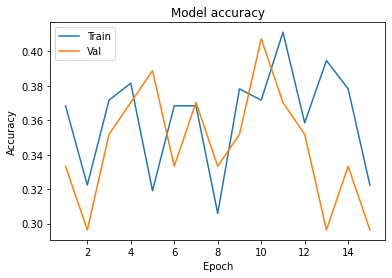

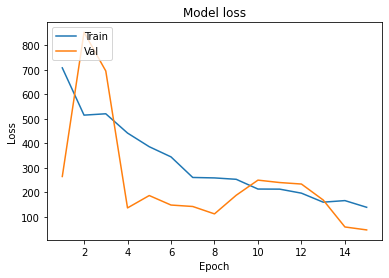

In [ ]:
plot_learningCurve(inception_res_history)

In [ ]:
inception_res_model.load_weights('t5_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_seg_image.classes
class_indices = train_seg_image.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

inception_res_preds = inception_res_model.predict(test_seg_image)
inception_res_pred_classes = np.argmax(inception_res_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

inception_res_acc = accuracy_score(true_classes, inception_res_pred_classes)

print("InceptionResNet-V2 Model Accuracy without Fine-Tuning: {:.2f}%".format(inception_res_acc * 100))

InceptionResNet-V2 Model Accuracy without Fine-Tuning: 62.41%


**InceptionResNet V2 (B)**

In [ ]:
#train_seg_image.reset()
#valid_seg_image.reset()
#test_generator.reset()
input_shape = (512, 512, 3)
# smaller learning rate
optim_6 = Adam(lr=0.0001)

#with Fine-Tuning
inception_res_model_ft = create_model3(input_shape, optim_6, fine_tune=2)

219062272/219055592 [==============================] - 9s 0us/step


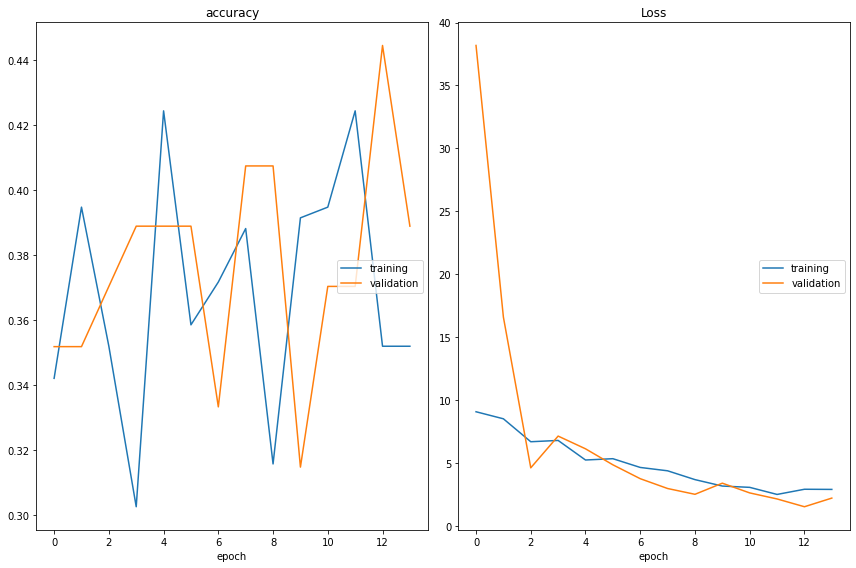

accuracy
	training         	 (min:    0.303, max:    0.424, cur:    0.352)
	validation       	 (min:    0.315, max:    0.444, cur:    0.389)
Loss
	training         	 (min:    2.511, max:    9.079, cur:    2.910)
	validation       	 (min:    1.533, max:   38.180, cur:    2.220)
CPU times: user 7min 54s, sys: 29.9 s, total: 8min 24s
Wall time: 14min 25s


In [ ]:
%%time

from livelossplot.inputs.keras import PlotLossesCallback
plot_loss_6 = PlotLossesCallback()

t6_checkpoint_1 = ModelCheckpoint(filepath='t6_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

inception_res_ft_history = inception_res_model_ft.fit(train_seg_image,validation_data=valid_seg_image,
                    epochs=15,steps_per_epoch=len(train_seg_image),
                    validation_steps=len(valid_seg_image),
                    callbacks=[t6_checkpoint_1, early_stop,plot_loss_6])

In [ ]:
inception_res_model_ft.load_weights('t6_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_seg_image.classes
class_indices = train_seg_image.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

inception_res_preds_ft = inception_res_model_ft.predict(test_seg_image)
inception_res_pred_classes_ft = np.argmax(inception_res_preds_ft, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

inception_res_acc_ft = accuracy_score(true_classes, inception_res_pred_classes_ft)

print("InceptionResNet-V2 Model Accuracy with Fine-Tuning: {:.2f}%".format(inception_res_acc_ft * 100))

InceptionResNet-V2 Model Accuracy with Fine-Tuning: 55.12%


**ResNet 50 (A)**

In [ ]:
def create_model4(input_shape, optimizer='rmsprop', fine_tune=0):
    
    conv_base = ResNet50(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
  
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    top_model = conv_base.output
    top_model = Flatten()(top_model)
    op_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model=  Dropout(0.2)(top_model)
    top_model = Dense(128, activation='relu')(top_model)
    output_layer = Dense(3, activation='softmax')(top_model)
    

    model = Model(inputs=conv_base.input, outputs=output_layer)

    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
input_shape = (512, 512, 3)
optim_7 = Adam(learning_rate=0.0001)

#  without Fine-tuning
resnet_model = create_model4(input_shape, optim_7, fine_tune=0)

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
t7_checkpoint_1 = ModelCheckpoint(filepath='t7_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

resnet_history = resnet_model.fit(train_seg_image,validation_data=valid_seg_image,
                    epochs=15,steps_per_epoch=len(train_seg_image),
                    validation_steps=len(valid_seg_image),
                    callbacks=[t7_checkpoint_1, early_stop])

Epoch 1/15
19/19 [==============================] - 34s 2s/step - loss: 4.3762 - accuracy: 0.5255 - val_loss: 0.8203 - val_accuracy: 0.8148

Epoch 00001: val_loss improved from inf to 0.82030, saving model to t7_model_v1.weights.best.hdf5
Epoch 2/15
19/19 [==============================] - 28s 1s/step - loss: 2.1030 - accuracy: 0.8149 - val_loss: 1.2904 - val_accuracy: 0.8519

Epoch 00002: val_loss did not improve from 0.82030
Epoch 3/15
19/19 [==============================] - 28s 1s/step - loss: 1.8575 - accuracy: 0.8106 - val_loss: 1.1521 - val_accuracy: 0.8519

Epoch 00003: val_loss did not improve from 0.82030
Epoch 4/15
19/19 [==============================] - 28s 1s/step - loss: 1.9321 - accuracy: 0.8176 - val_loss: 0.5487 - val_accuracy: 0.8704

Epoch 00004: val_loss improved from 0.82030 to 0.54867, saving model to t7_model_v1.weights.best.hdf5
Epoch 5/15
19/19 [==============================] - 27s 1s/step - loss: 1.3112 - accuracy: 0.8431 - val_loss: 0.2659 - val_accuracy: 0

In [ ]:
import matplotlib.pyplot as plt
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1,12)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

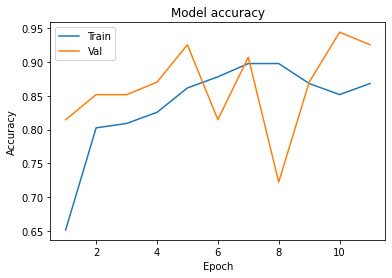

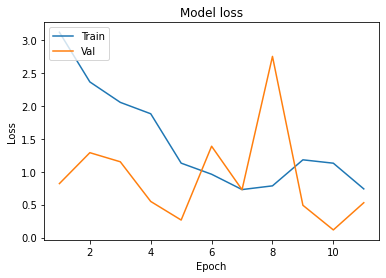

In [ ]:
plot_learningCurve(resnet_history)

In [ ]:
resnet_model.load_weights('t7_model_v1.weights.best.hdf5') # initialize the best trained weights

resnet_preds = resnet_model.predict(test_seg_image)
resnet_pred_classes = np.argmax(resnet_preds, axis=1)

In [ ]:
resnet_acc= accuracy_score(true_classes, resnet_pred_classes)

print("ResNet 50 Model Accuracy without Fine-Tuning: {:.2f}%".format(resnet_acc * 100))

ResNet 50 Model Accuracy without Fine-Tuning: 81.73%


**ResNet 50 (B)**

In [ ]:
input_shape = (512, 512, 3)
optim_8 = Adam(learning_rate=0.0001)

#  without Fine-tuning
resnet_model_ft = create_model4(input_shape, optim_8, fine_tune=2)

94773248/94765736 [==============================] - 1s 0us/step


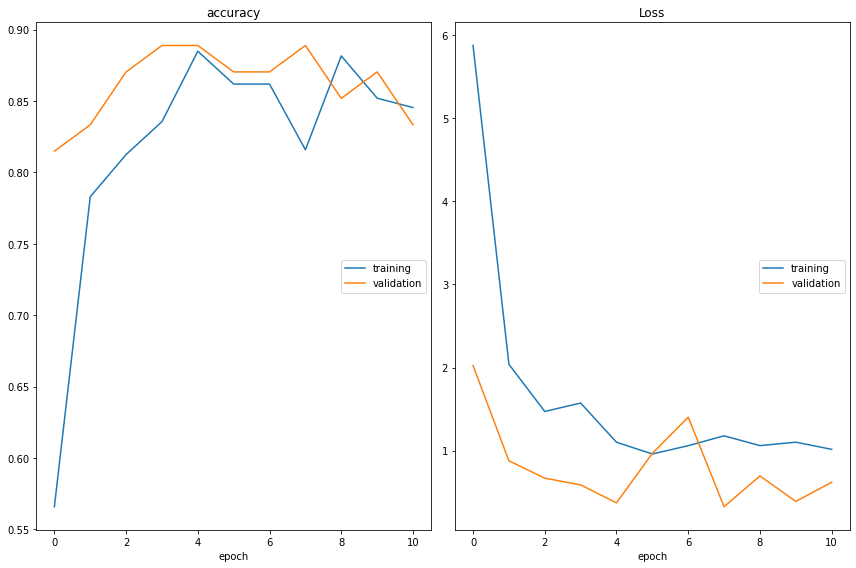

accuracy
	training         	 (min:    0.566, max:    0.885, cur:    0.845)
	validation       	 (min:    0.815, max:    0.889, cur:    0.833)
Loss
	training         	 (min:    0.959, max:    5.876, cur:    1.015)
	validation       	 (min:    0.325, max:    2.024, cur:    0.620)


In [ ]:
from livelossplot.inputs.keras import PlotLossesCallback
plot_loss_8 = PlotLossesCallback()

t8_checkpoint_1 = ModelCheckpoint(filepath='t8_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

resnet_history_ft = resnet_model_ft.fit(train_seg_image,validation_data=valid_seg_image,
                    epochs=15,steps_per_epoch=len(train_seg_image),
                    validation_steps=len(valid_seg_image),
                    callbacks=[t8_checkpoint_1, early_stop, plot_loss_8])

In [ ]:
resnet_model_ft.load_weights('t8_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_seg_image.classes
class_indices = train_seg_image.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

resnet_preds_ft = resnet_model_ft.predict(test_seg_image)
resnet_pred_classes_ft = np.argmax(resnet_preds_ft, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

resnet_acc_ft= accuracy_score(true_classes, resnet_pred_classes_ft)

print("ResNet 50 Model Accuracy with Fine-Tuning: {:.2f}%".format(resnet_acc_ft * 100))

ResNet 50 Model Accuracy with Fine-Tuning: 76.32%
